# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
df = pd.read_csv('data/hotel_booking.csv')
df.shape

(119390, 36)

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Clean data

- Use all features?
- Null values? Drop, mean, median, mode, ...
- Duplicated values? (see "duplicated" and "drop_duplicates" functions in pandas)
- Outliers.

## Useless features

Columns like "name", "email", etc. seem anonymized. Remove them as they provide no useful information.

In [5]:
df.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1, inplace=True)

## NaNs

### Inspection

In [6]:
# NaN values
nan_ser = df.isna().sum().sort_values(ascending=False)
nan_ser[nan_ser > 0]

company     112593
agent        16340
country        488
children         4
dtype: int64

In [7]:
df['children'].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

Based on the data description:
- NaN company probably means there is no company involved in the booking.
- NaN agent probably means there is no agent involved in the booking.
- NaN country probably means we don't know (or the client is not from an "accepted country").
- NaN children we don't know, we could probably assume there were no children.

Fill some NaN values. We'll later take care of `agent` and `company`.

In [8]:
df['country'].fillna('NoCountry', inplace=True)
df['children'].fillna(0, inplace=True)

## Dupicates

Duplicated rows:

In [9]:
df.duplicated().any()

True

In [10]:
df[df.duplicated(keep=False)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119372,City Hotel,0,175,2017,August,35,31,1,3,1,...,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,2017-09-04


## Outliers

There does not seem to be any outlier that is an error per se. Maybe there are some high values, but nothing very suspicious.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


## Save CSV

In [12]:
df.to_csv('data/hotel_booking_clean.csv', index=False)

# Exploratory Data Analysis (EDA)

In [93]:
df = pd.read_csv('data/hotel_booking_clean.csv')

- Outliers?
- Correlations?
- Consistency: do all values of the features and target make sense?
- Explore the data

## Numerical features distribution

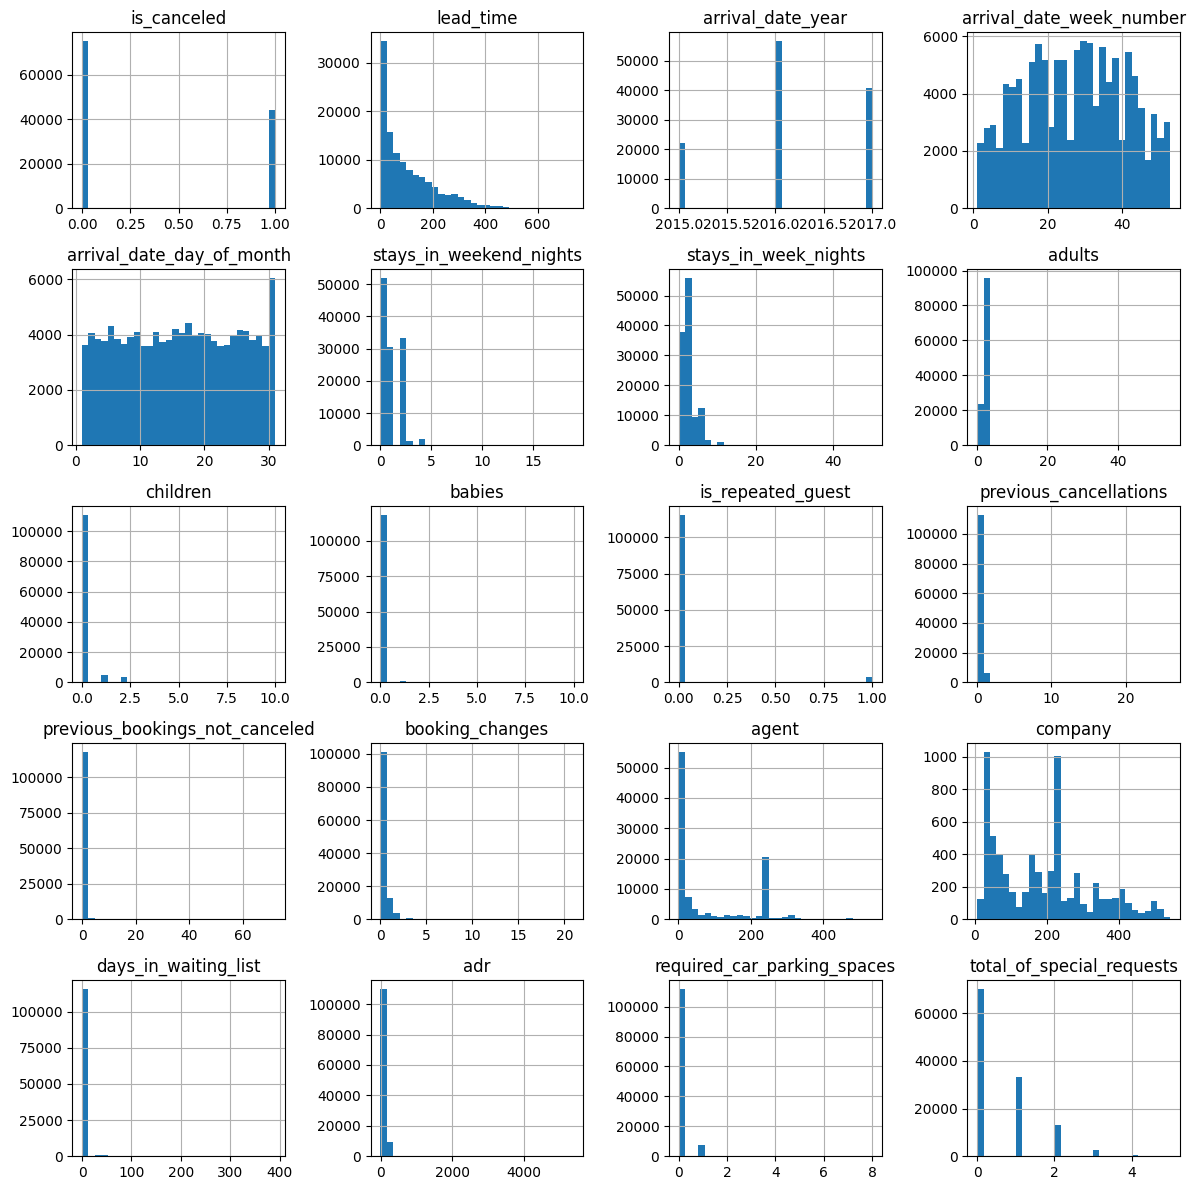

In [14]:
df.hist(bins=30, figsize=(12, 12))
plt.tight_layout()
plt.show()

## Categorical features distribution

In [15]:
# Categorical features
df.columns[df.dtypes == 'object']

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

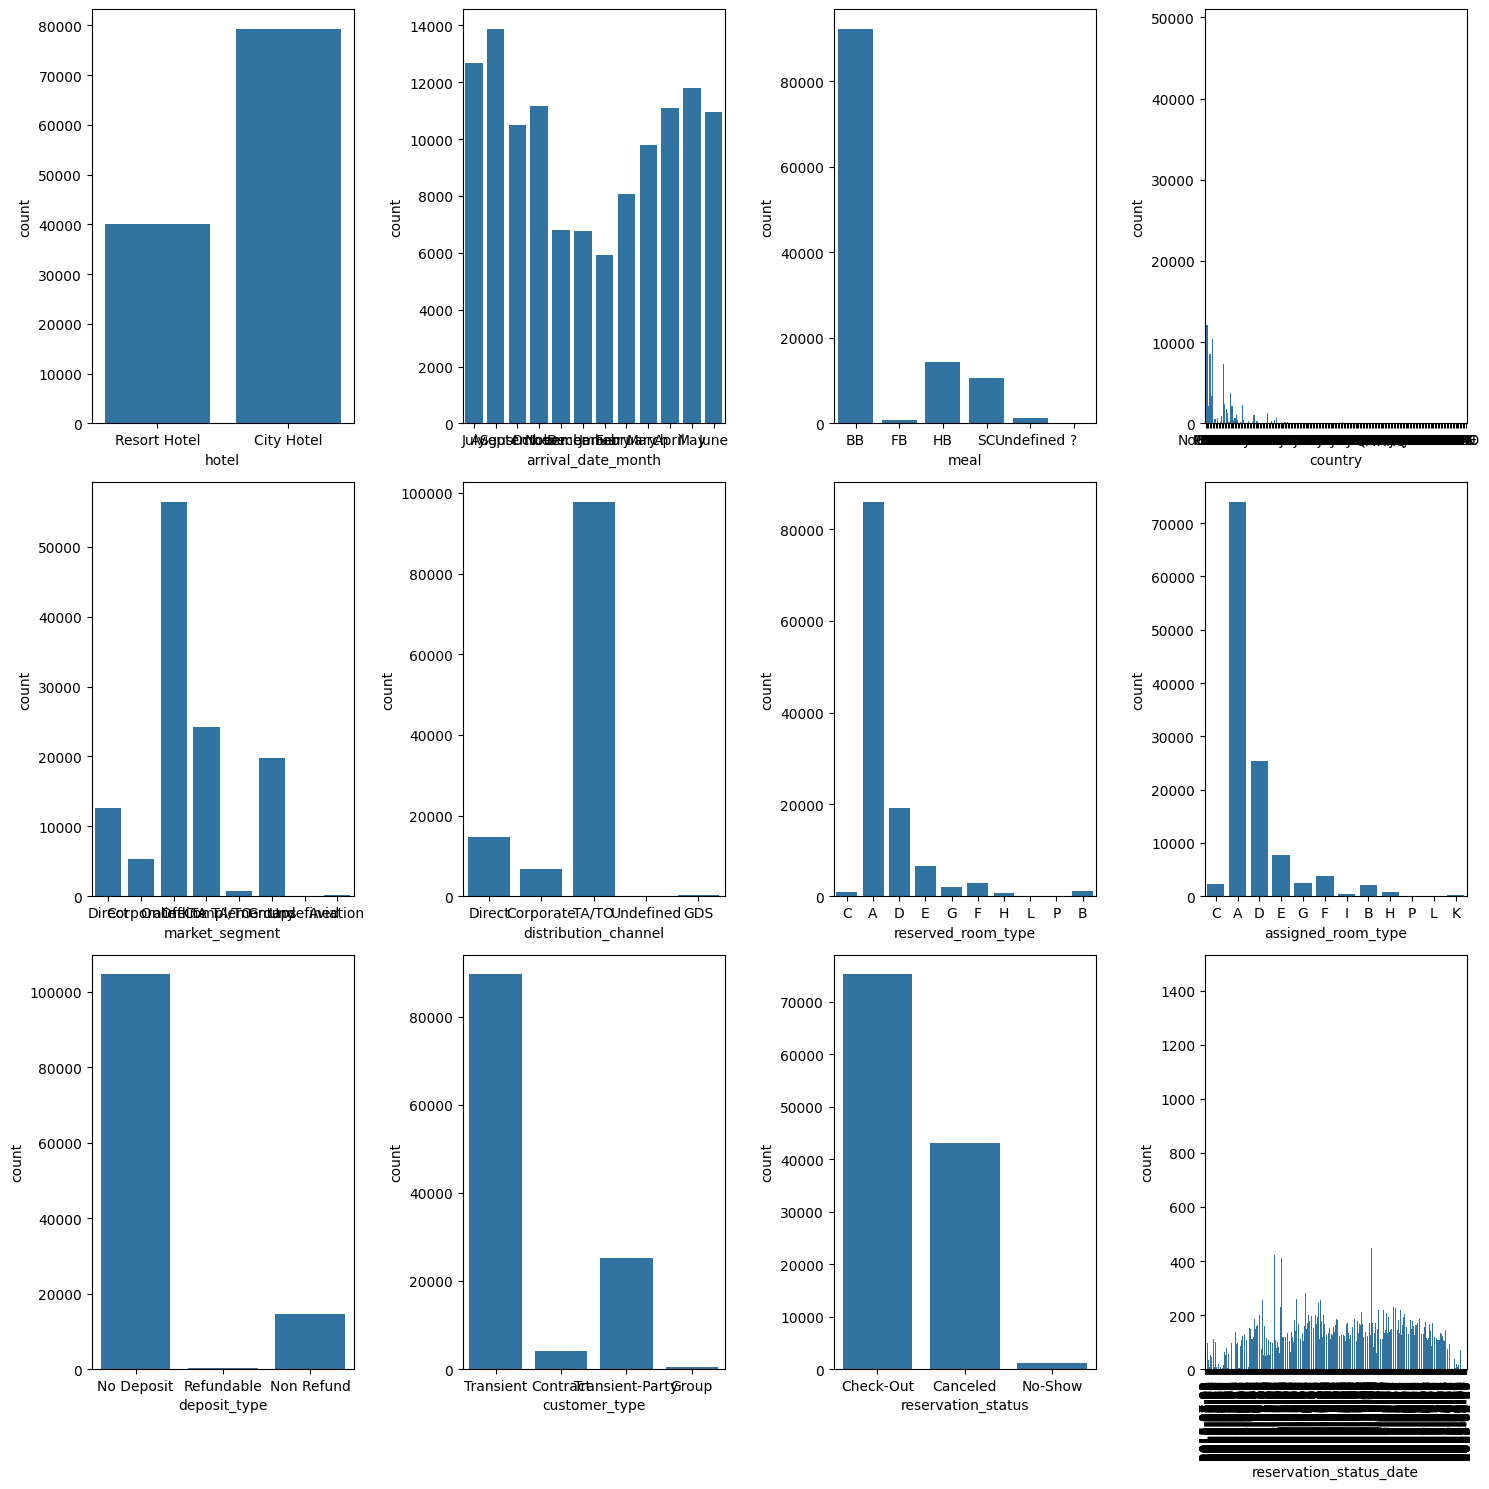

In [98]:
# 4 subplots in one row
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
obj_fts = df.columns[df.dtypes == 'object']

for i, col in enumerate(obj_fts):
    x, y = divmod(i, 4)
    sns.countplot(x=df[col], ax=axes[x, y])
    # axes[x, y].set_xticklabels(axes[x, y].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

## Correlation matrix

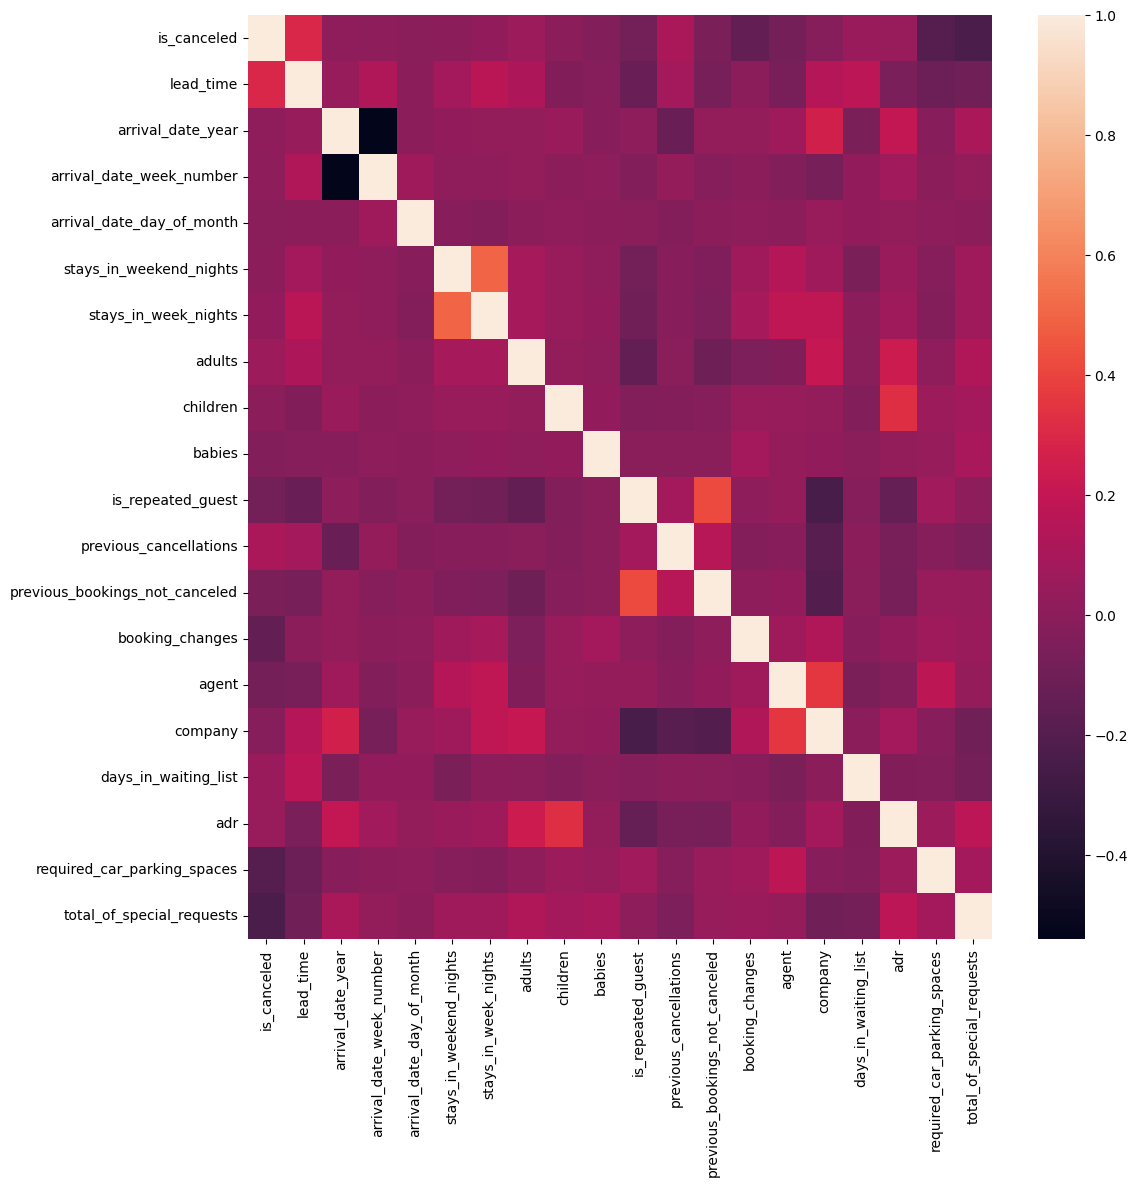

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True))
plt.show()

## Pair plot

In [18]:
# Numerical features
df.select_dtypes(include='number').columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [19]:
# Pairplot continuous features only
fts_to_pair = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
               'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
               'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
# fts_to_pair = ['lead_time', 'total_of_special_requests']

### Scatter

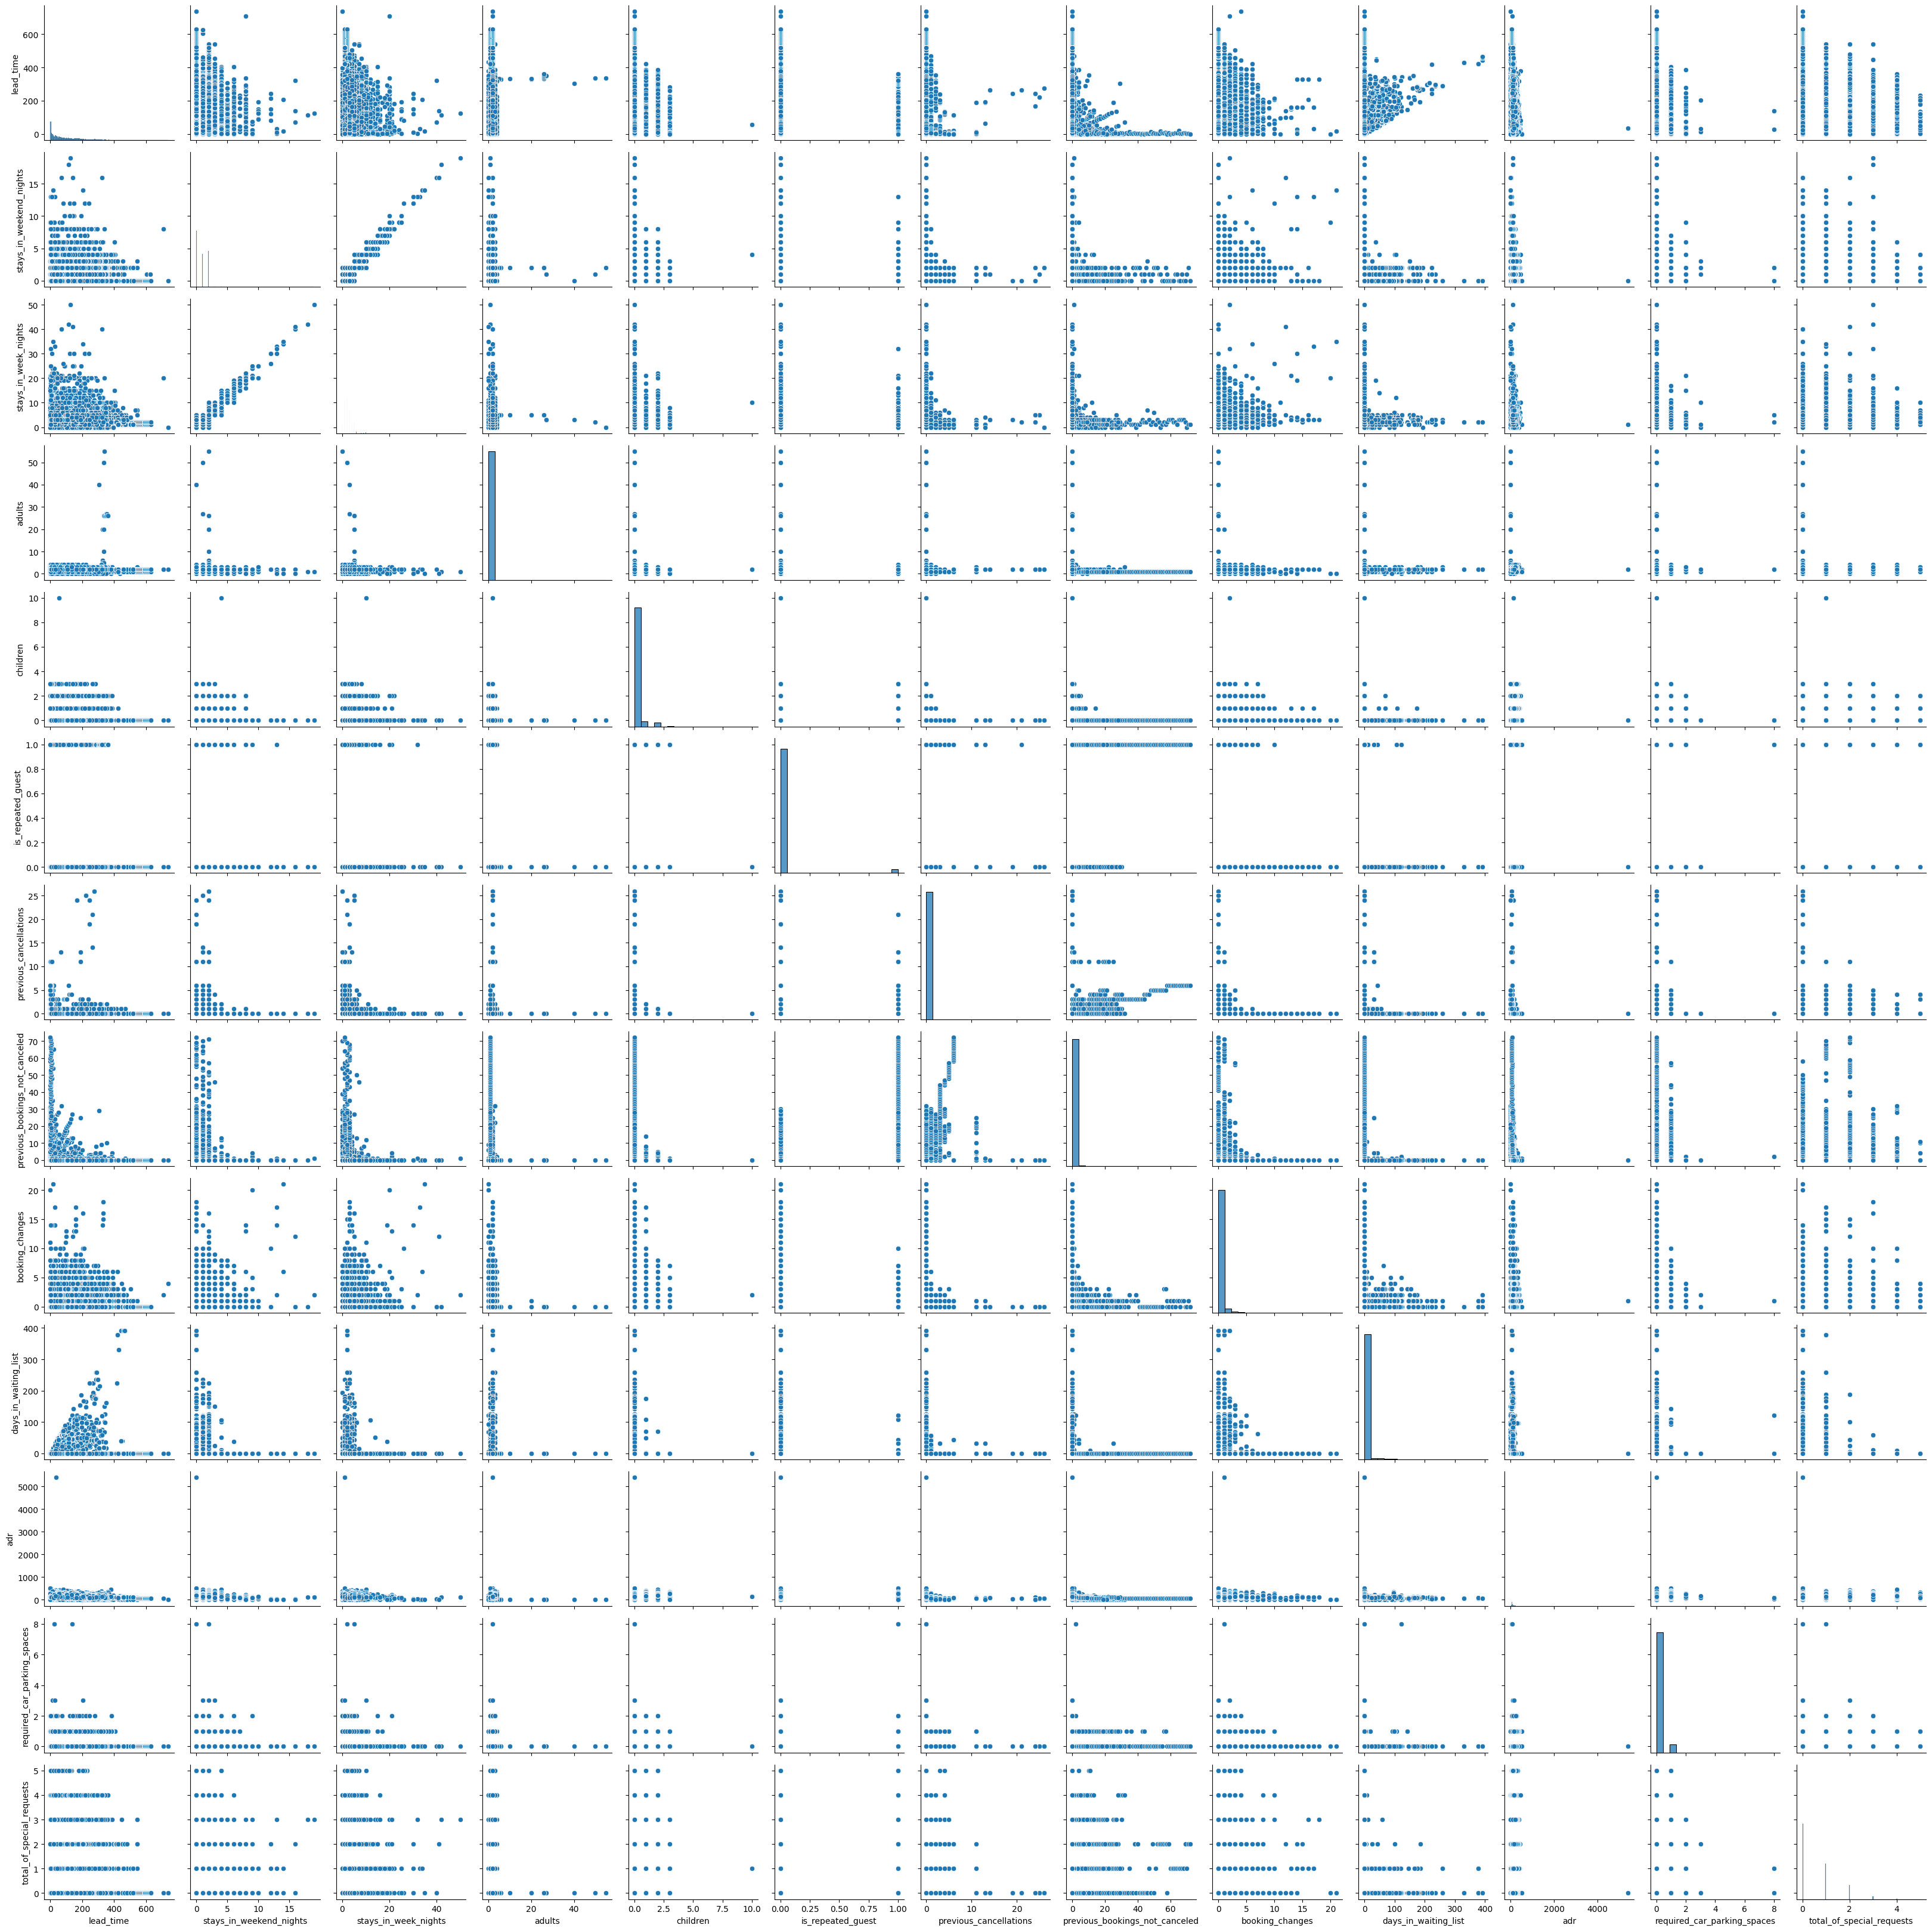

In [20]:
sns.pairplot(df[fts_to_pair])
plt.tight_layout()
plt.show()

## Correlation with target

In [21]:
# feature correlations with sale price
price_corrs = df.corr(numeric_only=True)['is_canceled'].sort_values(ascending=False)[1:].to_frame()

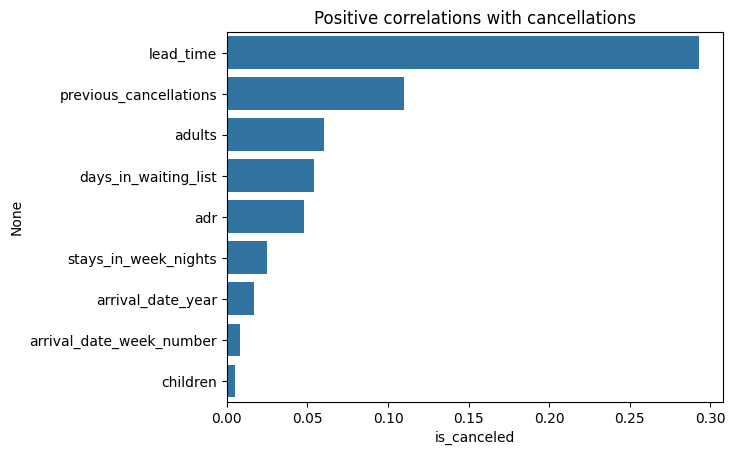

In [22]:
# positive correlations
pos_corrs = price_corrs[price_corrs['is_canceled'] >= 0]
sns.barplot(x='is_canceled', y=pos_corrs.index, data=pos_corrs)
plt.title('Positive correlations with cancellations')
plt.show()

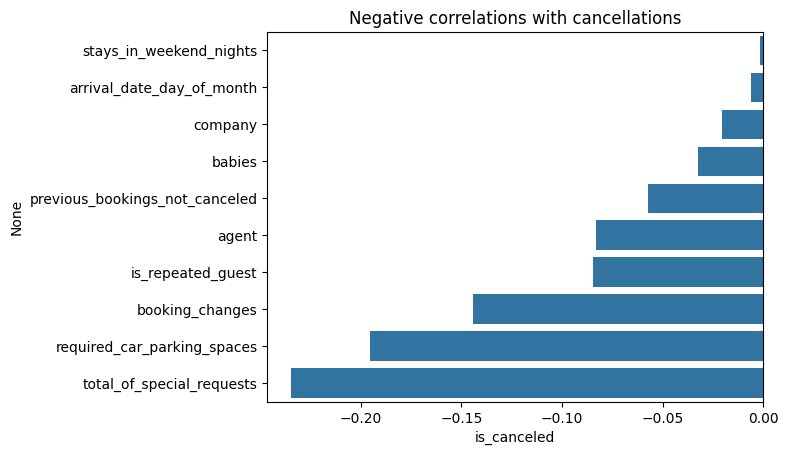

In [23]:
# negative correlations
neg_corrs = price_corrs[price_corrs['is_canceled'] < 0]
sns.barplot(x='is_canceled', y=neg_corrs.index, data=neg_corrs)
plt.title('Negative correlations with cancellations')
plt.show()

# Feature engineering

In [26]:
df = pd.read_csv('data/hotel_booking_clean.csv')

- Remove unnecessary features
- Encode categorical features: Label Encoding, One-Hot Encoding, ...
- Correlations?
- New features?

## Remove unnecessary features

- Take care with `reservation_status`, it is a potential data leak!!!
- `reservation_status_date` seems a potential leak as well.
- `distribution_channel` seems to be a subset of `market_segment`.

In [27]:
df['reservation_status'].value_counts()

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

In [28]:
df[['market_segment', 'distribution_channel']]

,market_segment,distribution_channel
0,Direct,Direct
1,Direct,Direct
2,Direct,Direct
3,Corporate,Corporate
4,Online TA,TA/TO
...,...,...
119385,Offline TA/TO,TA/TO
119386,Online TA,TA/TO
119387,Online TA,TA/TO
119388,Online TA,TA/TO


In [29]:
df.drop(['reservation_status', 'reservation_status_date', 'distribution_channel'], axis=1, inplace=True)

## Missing Imputations

Simplify:

In [30]:
df['is_agent'] = 1
df.loc[df['agent'].isna(), 'is_agent'] = 0

df['is_company'] = 1
df.loc[df['company'].isna(), 'is_company'] = 0

In [31]:
# df['agent'].fillna(-1, inplace=True)
# df['company'].fillna(-1, inplace=True)

## New features

In [32]:
df['room_changed'] = (df['assigned_room_type'] != df['reserved_room_type']).astype(int)
df['room_changed'].value_counts()

room_changed
0    104473
1     14917
Name: count, dtype: int64

Now that we know when an assigned room has changed, we can probably remove the assigned room without losing much info.

In [33]:
df.drop(['assigned_room_type'], axis=1, inplace=True)

## Country

Country requires special attention.

### Continent

In [34]:
import pycountry
import pycountry_convert as pc

In [35]:
# Get alpha2 country code from alpha3 code
def get_continent_code(alpha3_name):
    try:
        alpha2_name = pc.country_name_to_country_alpha2(alpha3_name)
        return pc.country_alpha2_to_continent_code(alpha2_name)
    except:
        return np.nan

In [36]:
# Compute continent for each country
df['continent'] = df['country'].apply(lambda c: get_continent_code(alpha3_name=c))
df['continent'].value_counts(dropna=False)

continent
EU     107826
AS       3189
SA       2708
NA       2274
NaN      1774
AF       1113
OC        506
Name: count, dtype: int64

In [37]:
# Some countries are unknown and Chine (CN) is not well processed, as it is in alpha2
df[df['continent'].isna()]['country'].value_counts()

country
CN           1279
NoCountry     488
TMP             3
ATA             2
UMI             1
ATF             1
Name: count, dtype: int64

In [38]:
# Set china as continent=AS
df.loc[df['country'] == 'CN', 'continent'] = 'AS'
# Set unknown countries as Unknown
df['continent'].fillna('Unknown', inplace=True)

In [39]:
df['continent'].value_counts(dropna=False)

continent
EU         107826
AS           4468
SA           2708
NA           2274
AF           1113
OC            506
Unknown       495
Name: count, dtype: int64

Another good option would be to compute latitude and longitude of the capital of each country, adding 2 extra columns with this info.

### Country

In [40]:
top_countries = df['country'].value_counts(dropna=False).head(10)
top_countries

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64

In [41]:
# Set non-top countries to 'Other'
df.loc[~df['country'].isin(top_countries.head(5).index), 'country'] = 'Other'

## Categorical features

Which one-hot encoding and which ordinal encoding?

We can ordinal encode: `meal`, `arrival_date_month`.

And one-hot encode: `hotel`, `market_segment`, `deposit_type`, `reserved_room_type`, `customer_type`, `continent`, `country`.

### One-hot encoding

In [42]:
fts_to_onehot = [
    'hotel',
    'market_segment',
    'deposit_type',
    'reserved_room_type',
    'customer_type',
    'continent',
    'country',
]

In [43]:
# Number of unique elements, to make sure we don't create too many columns
for ft in fts_to_onehot:
    print(ft, df[ft].nunique())

hotel 2
market_segment 8
deposit_type 3
reserved_room_type 10
customer_type 4
continent 7
country 6


In [44]:
df = pd.get_dummies(df, columns=fts_to_onehot, drop_first=True)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,continent_EU,continent_NA,continent_OC,continent_SA,continent_Unknown,country_ESP,country_FRA,country_GBR,country_Other,country_PRT
0,0,342,2015,July,27,1,0,0,2,0.0,...,True,False,False,False,False,False,False,False,False,True
1,0,737,2015,July,27,1,0,0,2,0.0,...,True,False,False,False,False,False,False,False,False,True
2,0,7,2015,July,27,1,0,1,1,0.0,...,True,False,False,False,False,False,False,True,False,False
3,0,13,2015,July,27,1,0,1,1,0.0,...,True,False,False,False,False,False,False,True,False,False
4,0,14,2015,July,27,1,0,2,2,0.0,...,True,False,False,False,False,False,False,True,False,False


### Ordinal Encoding

In [45]:
df.meal.value_counts()

meal
BB           92309
HB           14463
SC           10650
Undefined     1169
FB             798
?                1
Name: count, dtype: int64

In [46]:
# Merge SC, Undefined, and ? into one category
df.replace({'meal': {'Undefined': 'SC', '?': 'SC'}}, inplace=True)

In [47]:
df.meal.value_counts()

meal
BB    92309
HB    14463
SC    11820
FB      798
Name: count, dtype: int64

In [48]:
from sklearn.preprocessing import OrdinalEncoder

In [49]:
categories = {
    'meal': ['SC', 'BB', 'HB', 'FB'],
    'arrival_date_month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
}

In [50]:
enc = OrdinalEncoder(categories=list(categories.values()))
df[list(categories.keys())] = enc.fit_transform(df[list(categories.keys())])

## Correlations

In [52]:
# Get correlations between features without duplicates
corrs = df.drop(['agent', 'company'], axis=1).corr().unstack().reset_index().drop_duplicates()
# Remove correlations between the same feature
corrs = corrs[corrs['level_0'] != corrs['level_1']]
# Get high correlations
corrs[(corrs[0] > 0.95) | (corrs[0] < -0.95)]

,level_0,level_1,0
172,arrival_date_month,arrival_date_week_number,0.995105
227,arrival_date_week_number,arrival_date_month,0.995105


In [53]:
df.drop('arrival_date_week_number', axis=1, inplace=True)

## Pre-save DF

In [54]:
boolean_cols = df.columns[df.dtypes == 'bool']
df[boolean_cols] = df[boolean_cols].astype(int)

In [55]:
# Make sure there are no NaN values
assert df.isna().sum().sum() == 0

In [58]:
# Make sure all columns are numeric
assert df.select_dtypes(include='number').shape[1] == df.shape[1]

In [59]:
df.shape

(119390, 57)

In [83]:
# Save with country, agent, and company for performing some tests
df.drop(['agent', 'company'], axis=1).to_csv('data/hotel_booking_features.csv', index=False)

## New features

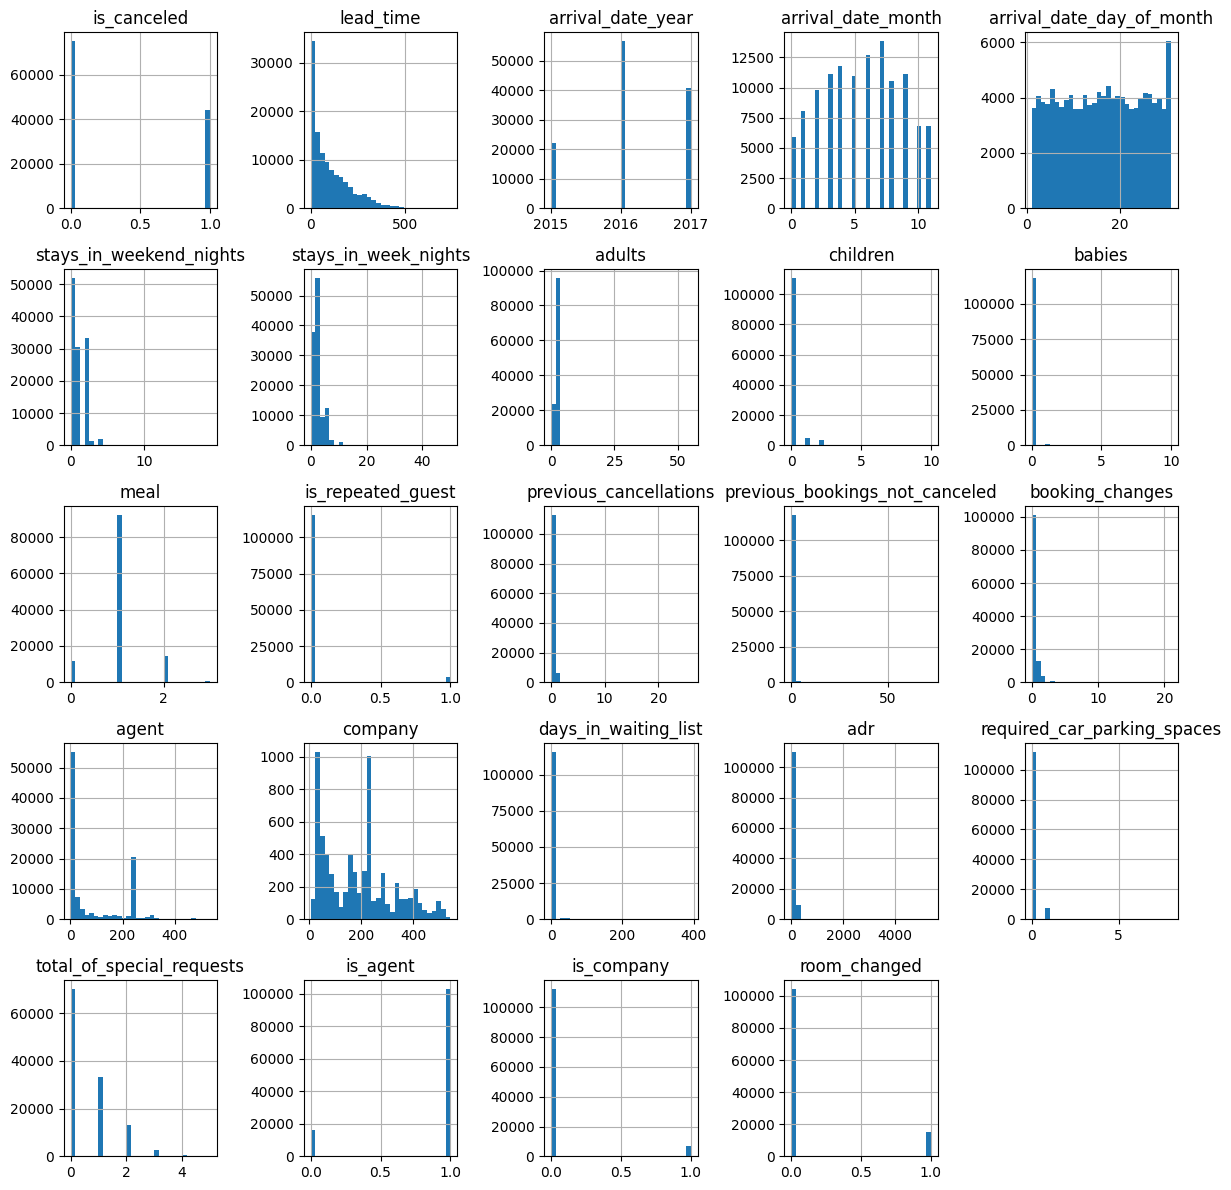

In [ ]:
df.hist(bins=30, figsize=(12, 12))
plt.tight_layout()
plt.show()

In [61]:
fts_to_log = [
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'children',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests',
]

In [62]:
for ft in fts_to_log:
    print(ft)
    df[f'{ft}_log'] = np.log1p(df[ft])
    # there is an error with adr_log, so we set it to 0
    df[f'{ft}_log'].fillna(0, inplace=True)

lead_time
stays_in_weekend_nights
stays_in_week_nights
children
previous_cancellations
previous_bookings_not_canceled
booking_changes
days_in_waiting_list
adr
required_car_parking_spaces
total_of_special_requests


/home/ibci/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [63]:
df.drop(fts_to_log, axis=1, inplace=True)

## Feature elimination

In [64]:
df.shape

(119390, 57)

In [65]:
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedRandomForestClassifier

In [67]:
sampled_df = df.sample(frac=0.2, random_state=42).drop(['agent', 'company'], axis=1)

In [69]:
brf = BalancedRandomForestClassifier(n_estimators=100, max_depth=10,
                                     sampling_strategy='not minority',
                                     replacement=True, random_state=42)
brf.fit(sampled_df.drop('is_canceled', axis=1), sampled_df['is_canceled'])

brf_ft_imps = pd.DataFrame({
    'feature': sampled_df.drop('is_canceled', axis=1).columns,
    'importance': brf.feature_importances_
}).sort_values('importance', ascending=False).round(3)

In [71]:
sampled_df_2 = df.sample(frac=0.2).drop(['agent', 'company'], axis=1)
print(classification_report(sampled_df_2['is_canceled'], brf.predict(sampled_df_2.drop('is_canceled', axis=1))))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     15125
           1       0.79      0.81      0.80      8753

    accuracy                           0.85     23878
   macro avg       0.84      0.84      0.84     23878
weighted avg       0.85      0.85      0.85     23878



In [74]:
brf_ft_imps.tail(20)

,feature,importance
12,market_segment_Corporate,0.002
22,reserved_room_type_D,0.001
20,reserved_room_type_B,0.001
23,reserved_room_type_E,0.001
36,continent_SA,0.001
32,continent_AS,0.001
25,reserved_room_type_G,0.001
37,continent_Unknown,0.001
34,continent_NA,0.001
21,reserved_room_type_C,0.000


In [75]:
# Remove reserved room types and continents
rrt_cols = [col for col in brf_ft_imps['feature'] if 'reserved_room_type' in col]
cont_cols = [col for col in brf_ft_imps['feature'] if 'continent' in col]
fts_to_drop = rrt_cols + cont_cols

df.drop(fts_to_drop, axis=1, inplace=True)

# Save DF

In [76]:
# Make sure there are no NaN values
assert df.isna().sum().sum() == 0

In [77]:
# Make sure all columns are numeric
assert df.select_dtypes(include='number').shape[1] == df.shape[1]

In [90]:
df.shape

(119390, 38)

In [80]:
df.drop(['agent', 'company'], axis=1).to_csv('data/hotel_booking_log_features.csv', index=False)

# Datetime features

In [86]:
df_raw = pd.read_csv('data/hotel_booking_clean.csv')
df_raw.shape

(119390, 32)

In [89]:
df = pd.read_csv('data/hotel_booking_log_features.csv')
df.shape

(119390, 40)

In [90]:
# Recover country, agent, and company
df['country'] = df_raw['country']
df['agent'] = df_raw['agent']
df['company'] = df_raw['company']

In [101]:
# Make sure samples are sorted by booking datetime

# Datetime of the arrival
arrival_dt = pd.to_datetime(df_raw.apply(lambda x: f"{x['arrival_date_year']}-W{x['arrival_date_week_number']}-1", axis=1), format="%Y-W%W-%w")
# Datetime of the reservation
booking_dt = arrival_dt - pd.to_timedelta(df_raw['lead_time'], unit='days')

# Sort by booking datetime
df = df.loc[booking_dt.sort_values().index].reset_index(drop=True)

In [128]:
# Calculate features based on datetime

for ft in ['agent', 'company']:
    groupb = df[~df[f'{ft}'].isna()].groupby(f'{ft}')

    # Number of bookings per ft
    df[f'{ft}_bookings'] = 0
    df.loc[~df[f'{ft}'].isna(), f'{ft}_bookings'] = groupb[f'is_{ft}'].cumsum()

    # Percentage of cancellations per ft
    df[f'{ft}_pct_cancellations'] = 0.0
    df.loc[~df[f'{ft}'].isna(), f'{ft}_pct_cancellations'] = groupb['is_canceled'].cumsum() / df[f'{ft}_bookings']



In [140]:
# Same but per country

# Number of bookings per country
df['country_bookings'] = 0
for country in df['country'].unique():
    same_country = df['country'] == country
    df.loc[same_country, 'country_bookings'] = range(1, same_country.sum() + 1)

# Percentage of cancellations per country
gb = df.groupby('country')
df[f'country_pct_cancellations'] = gb.apply(lambda g: g['is_canceled'].cumsum() / g['country_bookings']).reset_index(drop=True, level=0).sort_index()

# Set unknown countries to 0
df.loc[df['country'] == 'NoCountry', 'country_bookings'] = 0
df.loc[df['country'] == 'NoCountry', 'country_pct_cancellations'] = 0

In [152]:
# Make sure there are no NaN values
assert df.drop(['country', 'agent', 'company'], axis=1).isna().sum().sum() == 0

In [153]:
# Make sure all columns are numeric
assert df.drop(['country', 'agent', 'company'], axis=1).select_dtypes(include='number').shape[1] == df.drop(['country', 'agent', 'company'], axis=1).shape[1]

In [154]:
df.drop(['country', 'agent', 'company'], axis=1).shape

(119390, 46)

In [155]:
df.drop(['country', 'agent', 'company'], axis=1).to_csv('data/hotel_booking_dt_features.csv', index=False)